# 데이터분석 순서
0. 도메인 이해, 기획
#### KDD 분석 방법론
1. **데이터 세트 선택**
    * CSV, EXCEL, DB에서 데이터를 읽어옴 <br><br>
2. **데이터 전처리**
    * 데이터타입, 결측값, 이상치탐지, 데이터분포 분석, 상관관계<br><br>
3. **데이터 변환(특성 추출)**
    * 원본 데이터에서 새로운 데이터 생성, 삭제, 스케일링, 구간화<br><br>
4. **데이터 마이닝(모델만들기, 분석)**
    * 분석에 적합한 알고리즘 선택, 모델 생성, 튜닝<br><br>
5. **결과 평가**
    * 테스트 데이터를 이용해서 데이터 마이닝으로 만든 모델의 성능 평가<br><br>

6. 배포

# 데이터 전처리
* 데이터 타입 변환
* 결측값 탐지 및 보관
* 이상치 탐지 및 처리
* 데이터 특성 파악(치우침, 분포 특성)
* 변수들 간의 상관관계 분석

In [1]:
import pandas as pd
import numpy as np

# 1. 데이터 선택 및 로딩
* 데이터 로드 후 head(), tail()로 컬럼과 데이터를 파악

In [43]:
data = pd.read_csv('./data/Titanic_train.csv')
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


# 2. .info()로 컬럼명, 결측값, 데이터 타입 파악

In [3]:
# 데이터가 너무 커서 Non-Null이 표시 안될 때 : info(show_counts=True)
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3. describe()로 기초통계량 파악(이상치 파악)
* 평균과 중간값을 기준으로 max나 min이 너무 크거나 작으면 이상함을 파악

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. 결측값 찾고 비율 보고 대치 / 삭제하기
* 결측값 비율 계산 : isna().sum() / len(데이터프레임) * 100
### 완전 무작위 결측일 경우
* 결측값 비율이 5% 미만 : 행, 열을 제거 (why? 분석에 크게 영향을 미치지 않음)
* 결측값 비율이 5% ~ 30% : 결측값을 대체 (Imputation)
    * 수치형 데이터(숫자형 ex.나이, 가격) : 평균(mean), 중앙값(median), 최빈값(mode)으로 대체
    * 범주형 데이터(문자형/숫자형, 카테고리 ex.선실등급, 탑승지) : 최빈값(mode)으로 대체
* 결측값 비율이 30% ~ 50% : 컬럼의 중요도에 따라서 결측값을 대체 혹은 삭제
    * KNN(K-Nearest Neighbors, 최근접이웃) imputer, 회귀분석을 통해 결측값 대체
* 결측값 비율이 50% 이상 : 해당 컬럼 삭제

In [8]:
round(data.isna().sum() / data.shape[0] * 100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

## 결측값 데이터의 종류
1. MCAR (완전 무작위 결측) 
    * 다른 변수와 무관하게 생긴 결측(랜덤, 이유없음)
    * ex. 설문 조사 중 일부 응답자가 무작위로 답변을 건너뜀
2. MAR (무작위 결측)
    * 다른 변수와는 관련 있지만 본인과는 무관
    * ex. 나이가 많은 사람들이 소득란에 응답을 하지 않는 경우(나이와 관련)
    * ex. 직업에 따라서 학력란에 응답하지 않는 경우(가정환경, 소득 관련)
3. NMAR (비무작위 결측)
    * 변수 자기 자신과 직접 관련이 있는 경우
    * ex. 소득이 낮은 사람이 자신의 소득을 숨기는 경우(소득과 결측이 직접 관련)
    * ex. 체중이 많이 나가서 자산의 체중을 숨기는 경우
    * ex. 만족도가 낮은 고객이 만족도 조사에 응하지 않는 경우

## 결측치 처리방법
### 1) 단순대치법 (simple imputation)
    * 완전분석 : 결측값이 있는 모든 행을 삭제하고 완전한 자료만으로 분석(잘 안씀, why? 데이터 손실이 너무 큼)
    * 결측값을 삭제해도 모델을 만들기에 충분히 많은 데이터가 있는 경우 사용
    * 결측값을 삭제한 후에 데이터에 편향이 없다는 전제가 있을 때
    * dropna() : 결측값이 있는 모든 행 삭제
   

In [12]:
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


### 2) 평균 대치법
    * 결측치가 있는 컬럼에서 데이터의 평균을 구한 후 결측값을 대치
    * 평균을 이용하기 때문에 간편
    * 데이터에 이상치가 있을 경우 평균을 이용할 수 없음
    * 데이터에 이상치가 있는 경우 중앙값이나 최빈값을 이용해야함

In [21]:
a = pd.Series([24, 5, 10, 34, 20, 18, 28, 23])
b = pd.Series([24, 5, 10, 34, 20, 18, 28, 2000])

In [17]:
a.mean()

np.float64(19.875)

In [22]:
a.median()

np.float64(21.5)

In [19]:
b.mean()

np.float64(267.375)

In [23]:
sorted(b)

[5, 10, 18, 20, 24, 28, 34, 2000]

In [20]:
b.median()

np.float64(22.0)

In [24]:
age_na_idx = data[data['Age'].isna()].index

In [25]:
# 깊은 복사, 얕은 복사
data2 = data.copy()
data3 = data.copy()

In [44]:
data4 = data.copy()

In [26]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [27]:
data.loc[age_na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


In [29]:
data2['Age'].median()

np.float64(28.0)

In [30]:
data2['Age'] = data2['Age'].fillna(data2['Age'].median())

In [32]:
data2.loc[age_na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,28.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,NaN,S


In [38]:
data3['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [41]:
type(data3['Age'].mode())

pandas.core.series.Series

In [42]:
data3['Age'].mode()[0]

np.float64(24.0)

In [39]:
data3['Age'] = data3['Age'].fillna(data3['Age'].mode()[0])

In [40]:
data3.loc[age_na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,24.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,24.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,24.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,24.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,24.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,24.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,24.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,24.0,0,0,349217,7.8958,NaN,S


# scikit-learn의 simple imputer를 이용한 대치
* https://scikit-learn.org/stable/user_guide.html
* https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [45]:
from sklearn.impute import SimpleImputer # Class → 인스턴스를 만들어야됨

In [51]:
imp_mean = SimpleImputer(strategy='mean')
# fit_transform이 Series를 지원하지않음, 2차원 데이터를 넣어줘야함
data4['Age'] = imp_mean.fit_transform(data[['Age']])[:, 0]

In [46]:
imp_mean = SimpleImputer(strategy='mean')
# fit_transform이 Series를 지원하지않음
imp_mean.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 29.69911765, 19.        , 29.69911765, 29.69911765,
       40.        , 29.69911765, 29.69911765, 66.        , 28.        ,
       42.        , 29.69911765, 21.        , 18.        , 14.        ,
       40.        , 27.        , 29.69911765,  3.        , 19.        ,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       29.69911765, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 29.69911765,
       29.69911765, 29.        , 19.        , 17.        , 26.  

In [53]:
data4.loc[age_na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


In [56]:
imp_median = SimpleImputer(strategy='median')
data4['Age'] = imp_median.fit_transform(data[['Age']])[:,0]

In [57]:
data4.loc[age_na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,28.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,NaN,S


In [61]:
imp_mode = SimpleImputer(strategy='most_frequent')
data4['Age'] = imp_mode.fit_transform(data[['Age']])[:,0]

In [62]:
data4.loc[age_na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,24.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,24.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,24.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,24.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,24.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,24.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,24.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,24.0,0,0,349217,7.8958,NaN,S


In [65]:
imp_mode = SimpleImputer(strategy='most_frequent')
imp_mode.fit(data[['Age']])

SimpleImputer(strategy='most_frequent')

In [70]:
data5 = data.copy()

In [71]:
data5.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 결측값 30%~50%일 때 KNN 최근접이웃법

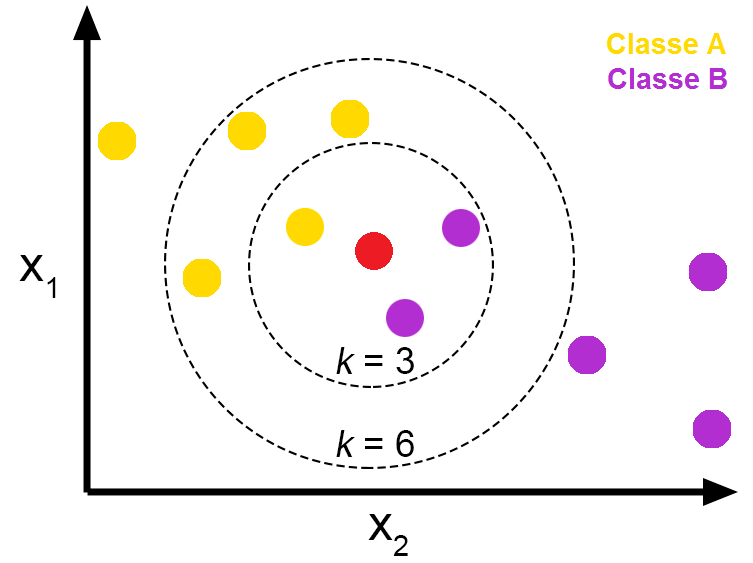

In [72]:
from sklearn.impute import KNNImputer

In [74]:
knn_imp = KNNImputer(n_neighbors=5)
data5['Age'] = knn_imp.fit_transform(data5[['Age']])[:,0]

In [77]:
data5.loc[age_na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


# 깊은 복사, 얕은 복사

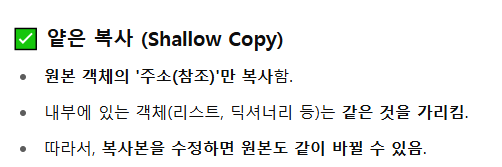

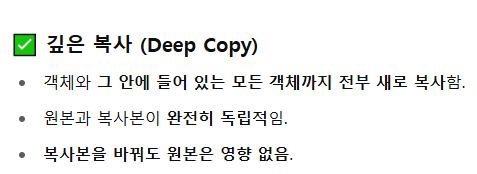

In [78]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
# data를 copy() 이용해서 복사
data_copied = data.copy()

# 다른변수에 data를 재할당
data_reassigned = data

In [82]:
data_reassigned['Age'] = data_reassigned['Age'].fillna(28)
data_reassigned['Age'].isna().sum()

np.int64(0)

In [83]:
data['Age'].isna().sum()

np.int64(0)

In [84]:
data.loc[age_na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,28.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,NaN,S


# 실제 메모리 상의 주소를 출력 id()

In [87]:
print('data의 메모리 주소 : ', id(data))
print('data_reassigned의 메모리 주소 : ', id(data_reassigned))
print('data_copied의 메모리 주소 : ', id(data_copied))

data의 메모리 주소 :  2179171991264
data_reassigned의 메모리 주소 :  2179171991264
data_copyed의 메모리 주소 :  2179340445248


In [90]:
id(data.loc[data['Age']>50, ['Name','Age']])

2179340453968

# 결측값이 너무 많을 경우 컬럼을 drop

In [92]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [95]:
data = data.drop('Cabin', axis=1)

In [96]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

# 카테고리 변수의 경우 최빈값 .mode() 이용해 처리

In [98]:
data['Embarked'].mode()[0]

'S'

In [99]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [100]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [101]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [102]:
data7 = data[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']]
print(id(data))
print(id(data7))

2179340961200
2179340952336
